In [1]:
import os
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
from helpers.settings import models_folder

In [10]:
n_models = 5

In [11]:
dfs = dict()

In [12]:
filename = 'ppe_boost_vs_overfitting.csv'
model_uids = ['mnist_mlp', 'mnist_cnn', 'cifar10_cnn']
for model_uid in model_uids:
    df = pd.read_csv(os.path.join(models_folder, model_uid, 'baselines', filename))
    dfs[model_uid] = df[df.model.isin([x for x in range(17, 17+ n_models)])]

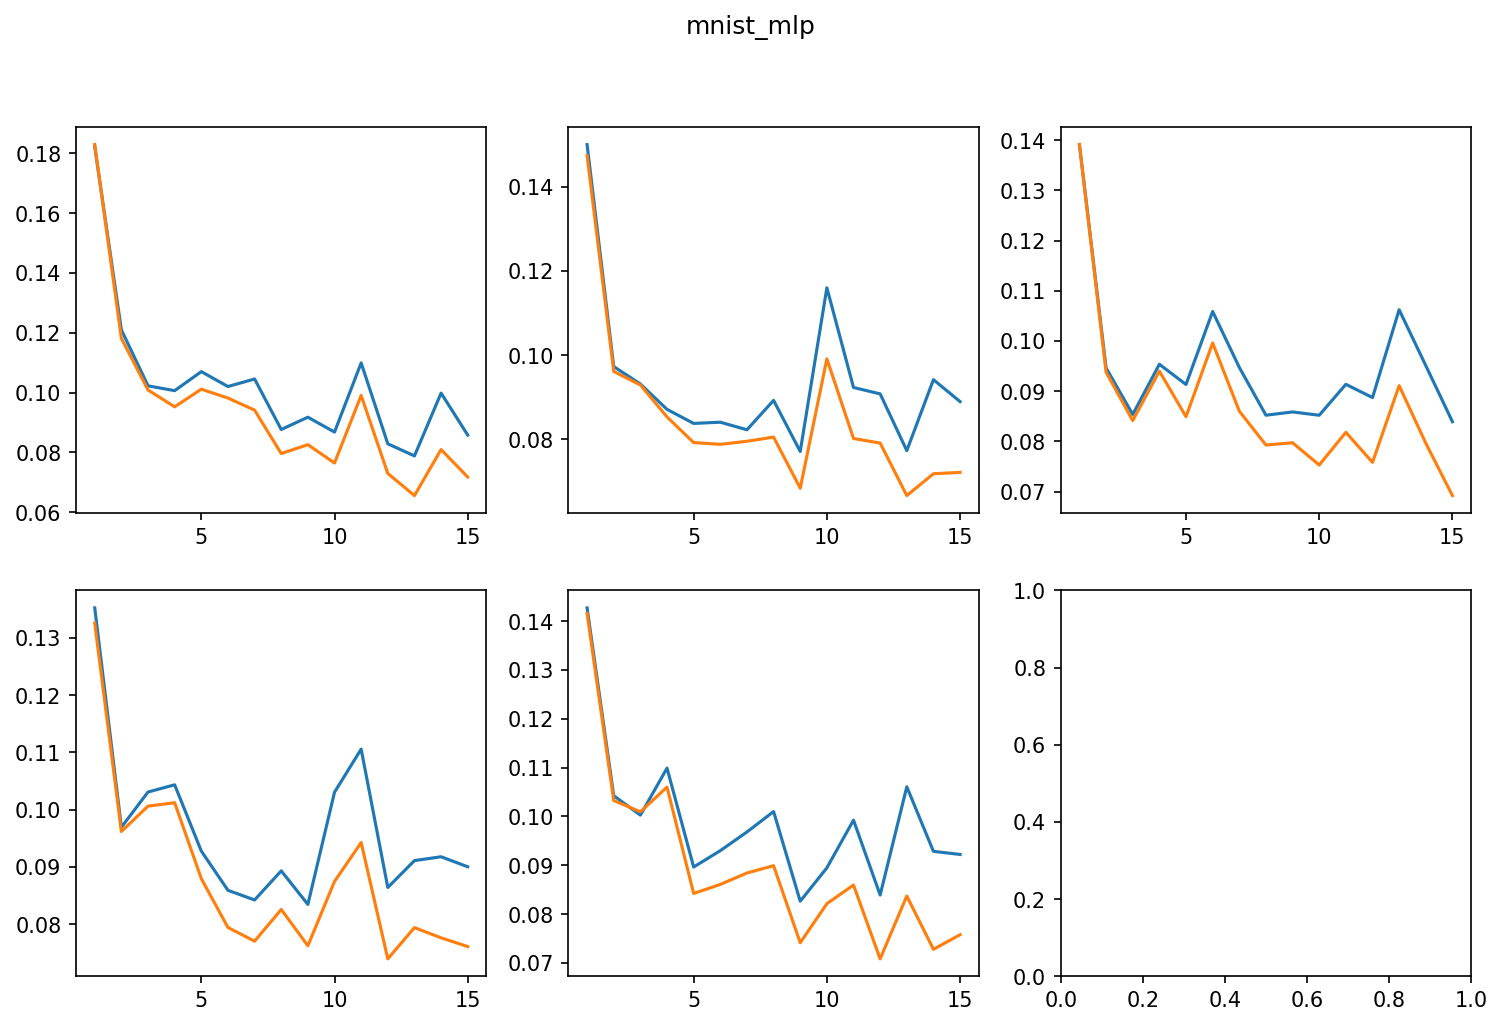

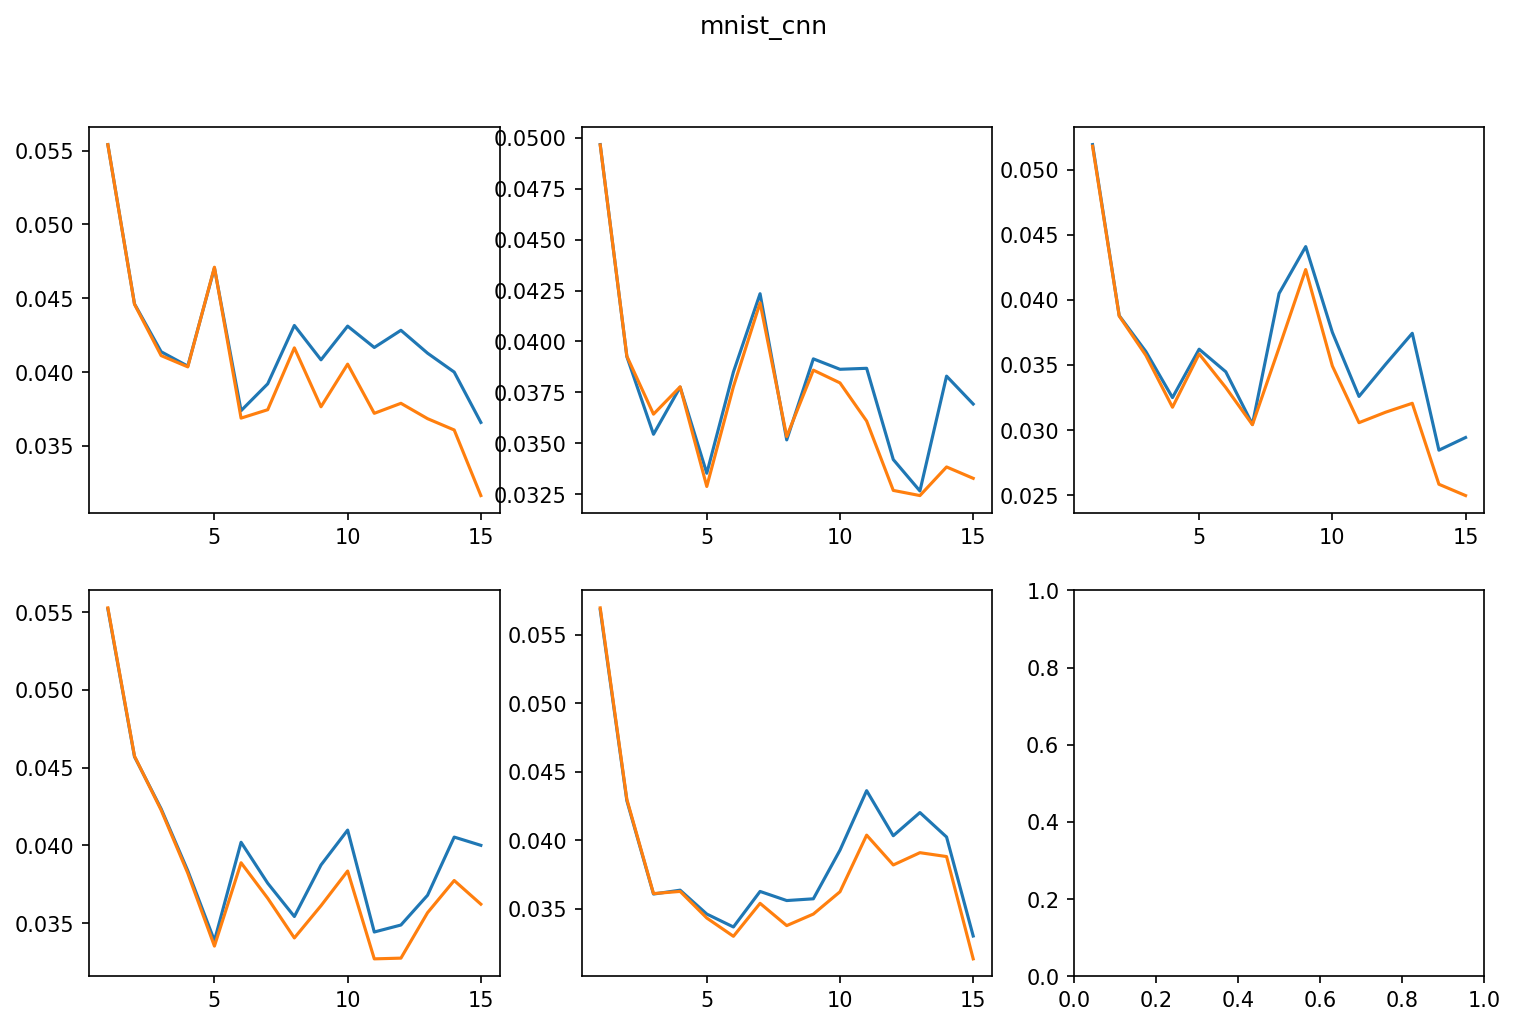

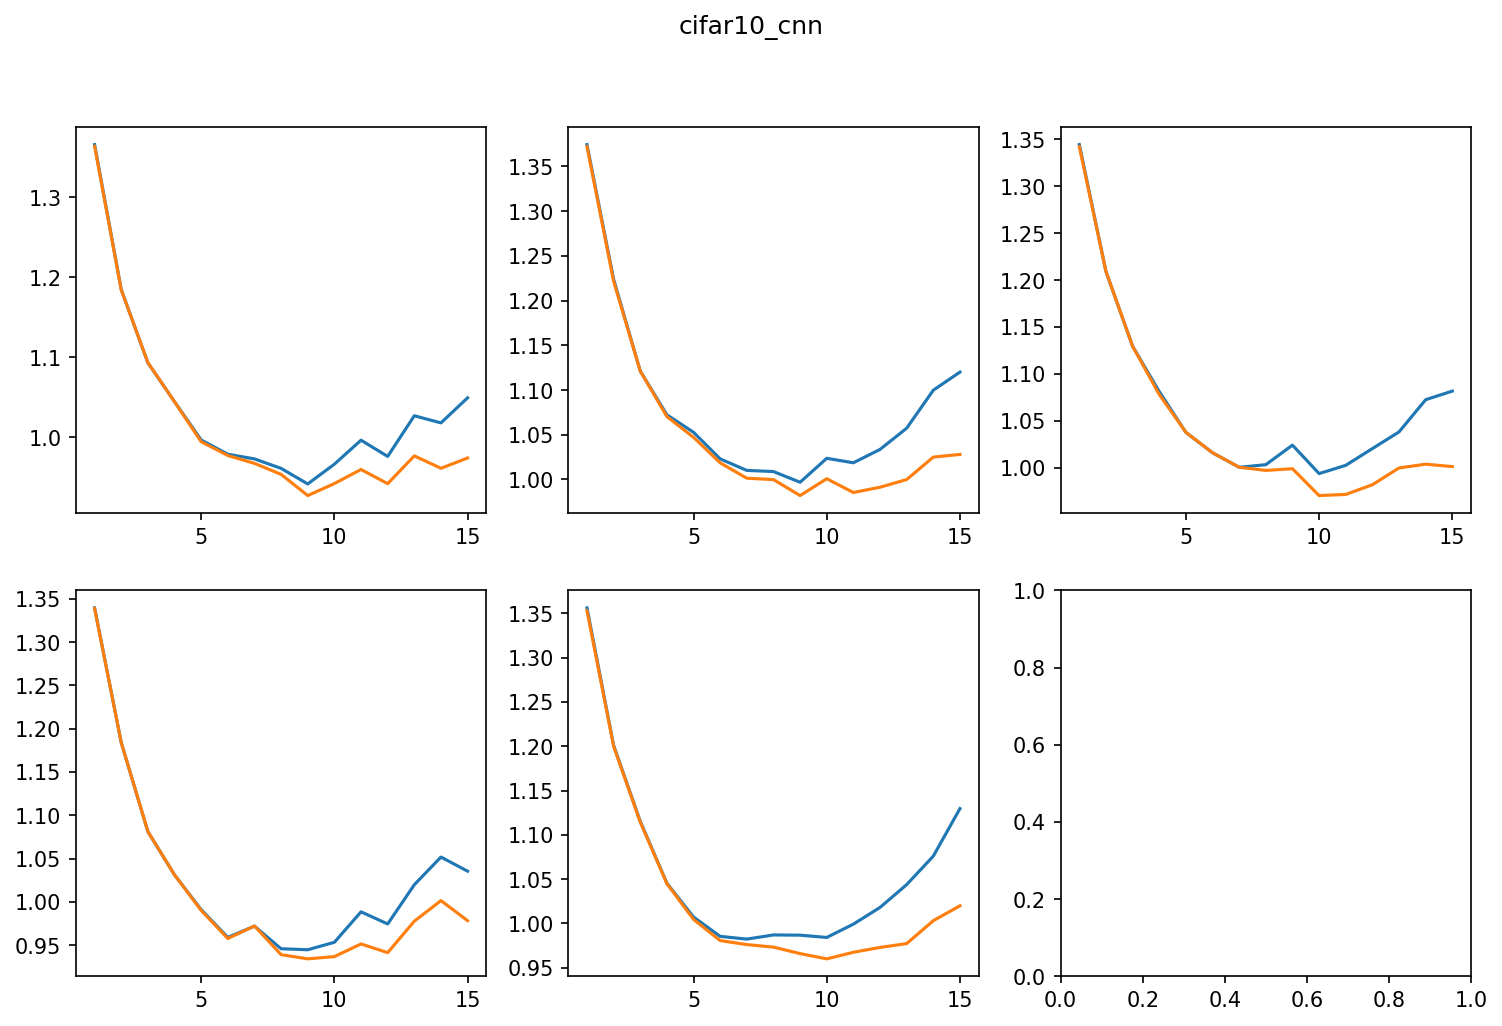

In [13]:
x = np.arange(1, 16)
for model_uid in model_uids:
    fig, axs = plt.subplots(2,n_models//2+1, figsize=(12,(1.5*n_models)), dpi=150)
    df = dfs[model_uid]
    axs = axs.ravel()
    for index, model_id in enumerate(range(17, 17+n_models)):
        df_single = df[df.model==model_id]
        axs[index].plot(x, df_single['nll'])
        axs[index].plot(x, df_single['nll ppe'])
        plt.suptitle(model_uid)

In [14]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'sans-serif': ['CMU Serif']})
rc('text', usetex=True)

In [15]:
output_folder = os.path.join(project_root, 'figure_2')
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

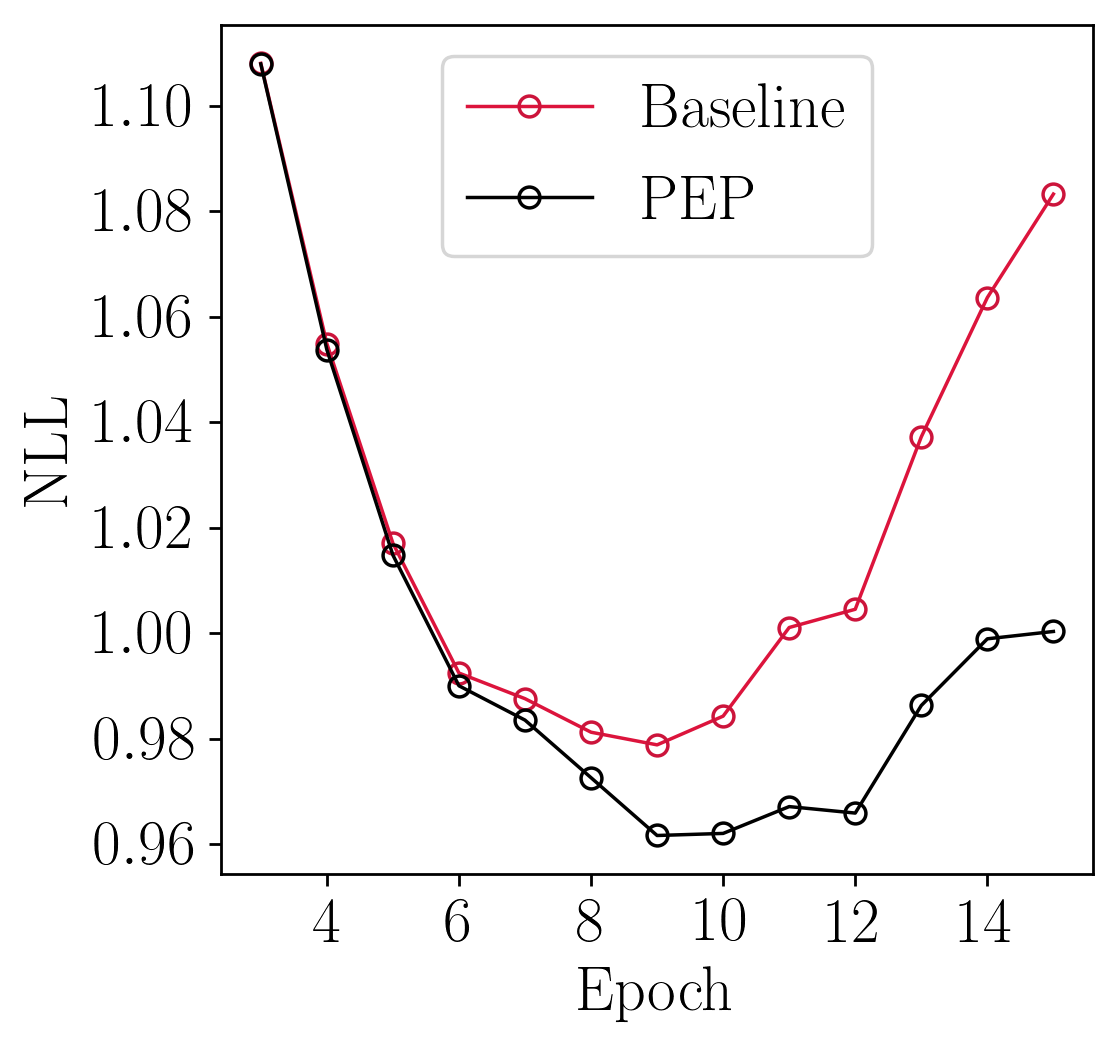

In [16]:
start=2
x = np.arange(start+1, 16)
fig, axs = plt.subplots(1,1, figsize=(4.5,4.5), dpi=250)
model_id = 19 
df = dfs[model_uid]
df_single = df.groupby('checkpoint').mean()
axs.plot(x, df_single['nll'][start:], '-o', color='crimson', lw=1, mfc=(1,1,1,0), mec=(0.8,0.08,0.23,1), label='Baseline')
axs.plot(x, df_single['nll ppe'][start:], '-o', color='k', lw=1, mfc=(1,1,1,0), mec=(0,0,0,1), label='PEP')
axs.set_ylabel('NLL', fontsize=18)
axs.set_xlabel('Epoch', fontsize=18)
for tick in axs.xaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
for tick in axs.yaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
plt.legend(fontsize=18)
plt.legend(fontsize=18)
output_path = os.path.join(output_folder, 'boost_overfit.pdf')
output_path = os.path.join(output_folder, 'boost_overfit.png')
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [20]:
for model_uid in model_uids:
    logs = list()
    for i in range(17,17+n_models):
        log_path = os.path.join(os.path.join(models_folder, model_uid, 'baselines', str(i), 'log.csv'))
        df_model = pd.read_csv(log_path)
        df_model['model'] = i
        logs.append(df_model)
    train_logs = pd.concat(logs)
    dfs[model_uid]['loss'] = train_logs['loss'].values
    dfs[model_uid]['val_loss'] = train_logs['val_loss'].values
    dfs[model_uid]['Overfitting'] = dfs[model_uid]['nll'] - dfs[model_uid]['loss']
    dfs[model_uid]['EPP boost'] = dfs[model_uid]['nll'] - dfs[model_uid]['nll ppe']

In [21]:
dfs[model_uid]

,Unnamed: 0,model,checkpoint,optimal sigma,nll,nll ppe,loss,val_loss,Overfitting,EPP boost
0,0,17,weights.01.hdf5,0.010488,1.365858,1.363745,1.648175,1.355564,-0.282317,0.002113
1,1,17,weights.02.hdf5,0.005418,1.184608,1.184195,1.235733,1.174798,-0.051124,0.000414
2,2,17,weights.03.hdf5,0.007546,1.093056,1.093388,1.075023,1.074817,0.018033,-0.000333
3,3,17,weights.04.hdf5,0.007044,1.044539,1.044375,0.964898,1.019198,0.079642,0.000165
4,4,17,weights.05.hdf5,0.010488,0.996599,0.994514,0.880466,0.969821,0.116133,0.002086
...,...,...,...,...,...,...,...,...,...,...
70,70,21,weights.11.hdf5,0.020820,0.999232,0.967453,0.513244,0.968075,0.485988,0.031779
71,71,21,weights.12.hdf5,0.021633,1.018046,0.972914,0.468590,0.967124,0.549457,0.045133
72,72,21,weights.13.hdf5,0.025078,1.043830,0.977255,0.423248,0.991835,0.620582,0.066575
73,73,21,weights.14.hdf5,0.025078,1.075998,1.003125,0.379834,1.035096,0.696164,0.072873


7
15
18
7
15
18


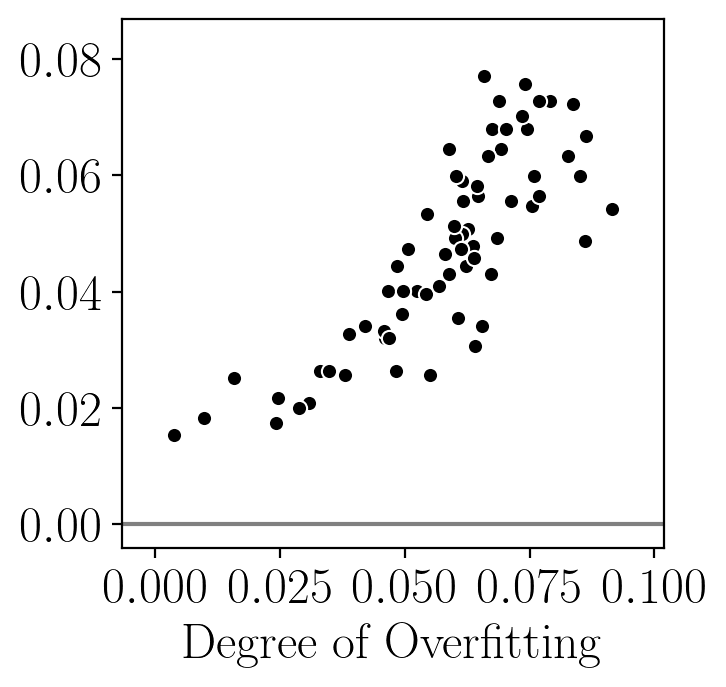

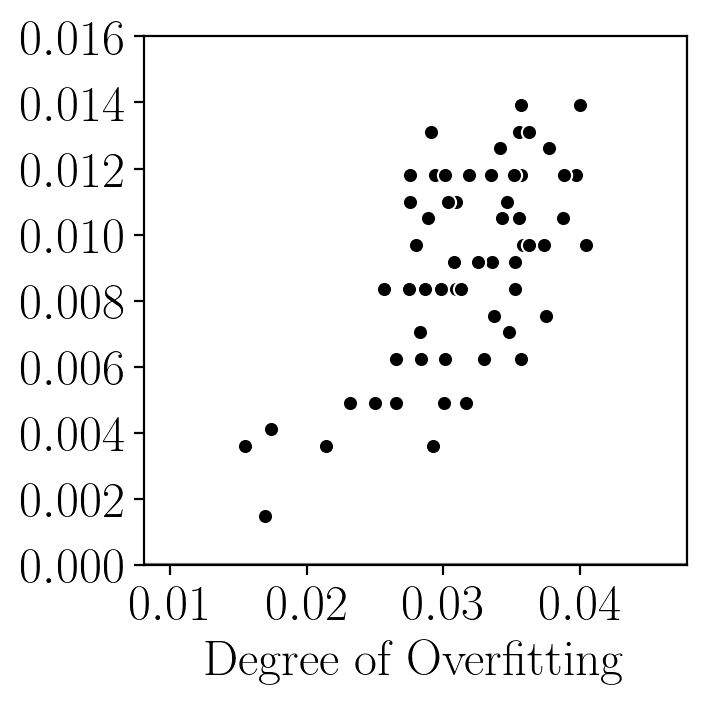

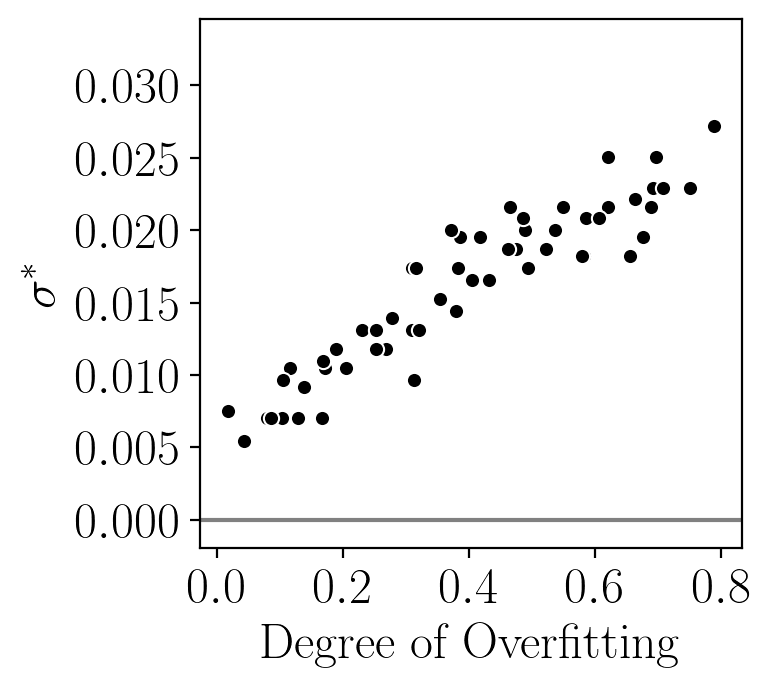

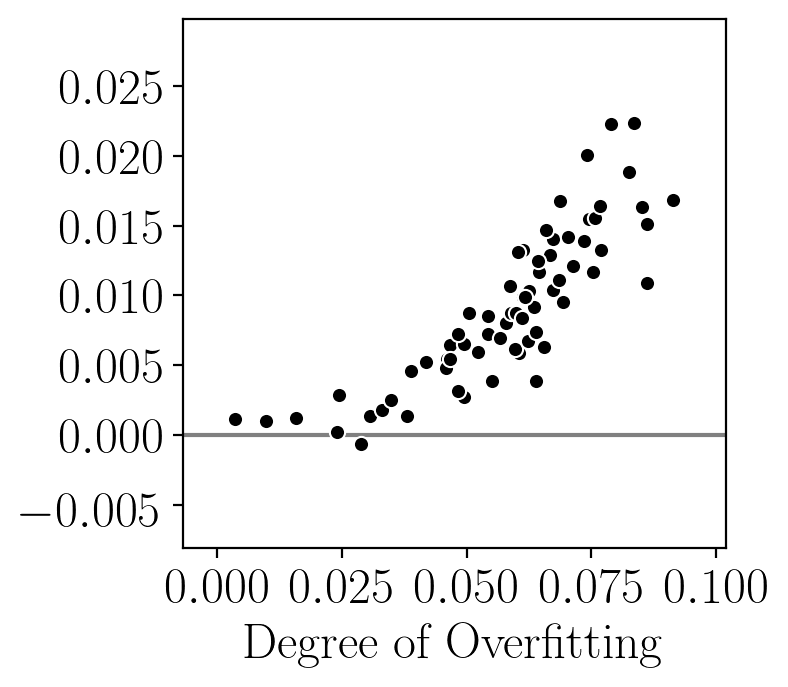

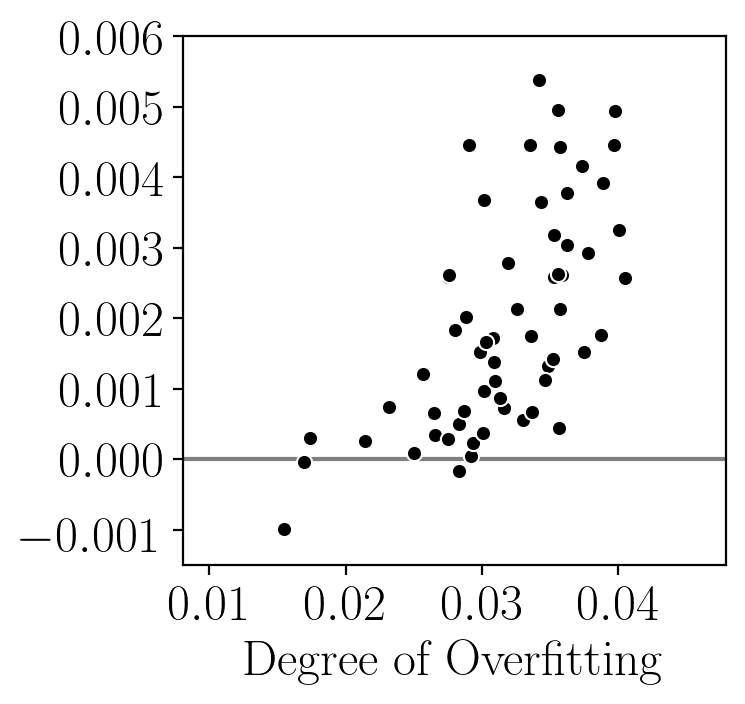

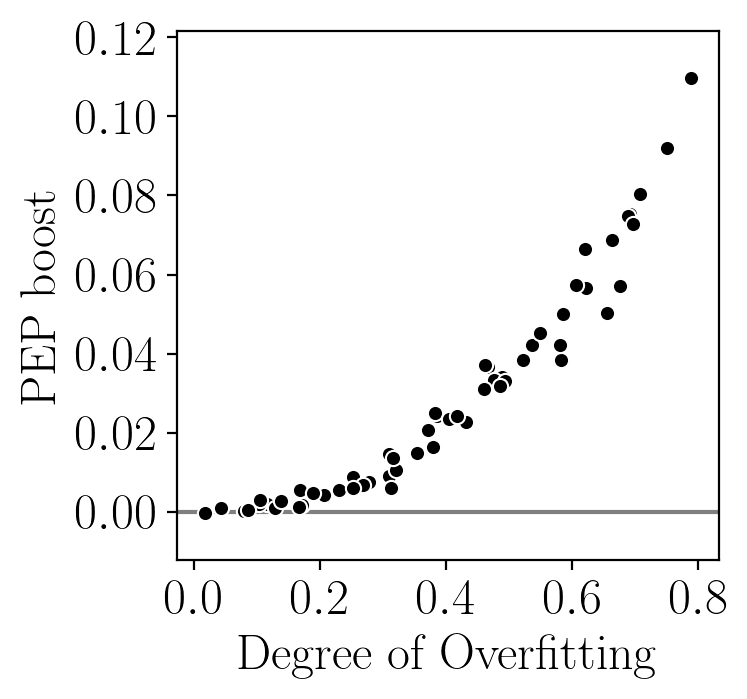

In [22]:
for metric in ['optimal sigma', 'EPP boost']:
    for index, df in enumerate(dfs.values()):
        plt.figure(figsize=(3.5,3.5),dpi=200)
        df_f = df[(df.Overfitting>=0) & (df['optimal sigma']>0.001)]
        print(len(df) - len(df_f))
        plt.subplot(1,1,1)
        ax = sns.scatterplot(x='Overfitting', y=metric, data=df_f, color='k', s=30)
        if index == 2:
            if metric == 'optimal sigma':
                plt.ylabel(r'$\sigma^{*}$', fontsize=18)
            else:
                plt.ylabel('PEP boost', fontsize=18)
        else:
            plt.ylabel('')
        if index == 1 and metric == 'EPP boost':
            plt.ylim([-0.0015, 0.006])
        if index == 1 and metric == 'optimal sigma':
            plt.ylim([0.000, 0.016])
        #if metric == 'optimal sigma':
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        ax.axhline(0, color='gray', zorder=0)
        plt.xlabel('Degree of Overfitting', fontsize=18)
        plt.locator_params(axis='x', nbins=5)
        #else:
        #    plt.xlabel(' ', fontsize=18)
        output_path = os.path.join(output_folder, model_uids[index]+ '_' + metric + '.pdf')
        output_path = os.path.join(output_folder, model_uids[index]+ '_' + metric + '.png')
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)